In [ ]:
import tensorflow as tf
import tensorflow.keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)
print(tf.keras.__version__)

# Sequential
Takes the list of layers as input and bundles them together as a simple network, one layer after another. But one could also start with an empty model and add layers afterwards if they wished.

# Flatten
Simply reformats the data by converting the 2-D array to a 1-D array, no parameters to learn in this layer.

Lecture 3

# Dense hidden layer
The dense layer is a densely or fully connected layer. This layer comprises 128 nodes/neurons. The dense layer is connected to the output of the previous layer, so that each input (e.g. 28x28 pixels) is now connected to each of the 128 nodes/neurons of the dense layer. Each of these connections (784x128 = 100352 connections) has an associated weight value, and each node has an associated bias (128 biases). Matrix-vector multiplication is performed by this layer, enabling the connection between every input of the layer to every output of the layer. The activation function transforms the input values of the layer nodes and introduces the non-linearity into the model which is necessary for the model to be trained and to learn the relationships between the data. The activation function selected here is 'relu'.

Lecture 3

# Dense output layer
The final layer of the matrix is another dense layer, with 10 nodes representing the 10 possible outputs (digits 0-9). When the model has been successfully trained, this layer will assess whether the input of a '4' image is given by the correct output number label (0-9), i.e. does the image input match the number output. The activation function chosen here can be 'softmax' or 'sigmoid'.

Lecture 3

# Embedding Layer

The embedding layer is often used in text classification models. Instead of using one-hot embedding to represent an integer-encoded word as a very large dimensional vector, we can use this layer to to map a specific word to a vector of a significantly lower dimension, such as 16. Each word in a specific block of text will thus be associated with a 16 dimensional vector (number of words in text sample x 16 = number of total paramaters being mapped). This avoids the use of very large dimensional vectors being used, and thus improves computational efficiency. Moreover, the model will learn these mapped paramteres as it trains, and thus certain words that are similar may be mapped to similar embedding vectors. 

Dimensions = (batch, length of word sequence (text input), embedding output). 

https://www.tensorflow.org/text/guide/word_embeddings

https://www.tensorflow.org/tutorials/keras/text_classification


# Global Average Pooling

A GlobalAveragePooling1D layer is used to average the previous layer output (often an embedding layer) over text seuqence dimension. For example, if the input to this layer (following embedding) was of 256x16 dimensions, then this layer will retain only the one vector of 16 elements. This allows large input text sequences to be represented essentially by one low dimensional vector, allowing the model to process inputs of various initial lengths all as a fixed length vector.

Lecture 4

https://www.tensorflow.org/text/guide/word_embeddings

# Dropout Layer

A dropout layer prevents a certain fraction of the neuron inputs from getting to the next layer, at random. It does this by randomly silencing or 'dropping' neurons in the network for each step, thus reducing the complexity of the model. 

This forces the network to not rely on the previous layer, as any one of the previous neurons could be dropped at random. Overall, this allows the weight to be further distributed across all neuron corrections, rather than one neuron of a layer having a particularly high weight value. The model may no longer be forced to correct potential mistakes of previous layers, making it more robust overall.

This may help suppress overfitting as the model is now more likely to look for generic features rather than just remembering input-specific features.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/


# Convolutional Neural Network Layers
https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

https://stackoverflow.com/questions/43306323/keras-conv2d-and-input-channels

With simple densely connected networks, image processing can result in a vast number of trainable paramaters, which in turn can result in slow computation but also the problem of overfitting. Additionally, these basic networks cannot process spatial information, and will struggle to detect class-defining features if their positioning differs from image to image. For example, a model may just be learning that an image of a car is always associated with a feature at the top right of an image, and thus will fail to make an accurate predictions if this feature appears in the bottom right of the next car image. 

Convolutional neural networks (CNNs) are much more suited to image processing, as they allow spatial information to be processed, meaning the model can recognise, and assign learnable paramaters to, class distinguishing features wherever they are to appear in an image. 

A CNN is able to process this spatial information via kernel convolution, which involves the use of a kernel/filter of a specified dimension (e.g. 3x3). The filter will pass over the entire image array, moving over the array in portions that match the filter dimensions and the specified stride length. Each time it hovers over one of these portions, it will perform a matrix multiplication between the values within the filter matrix and the values within the specific portion of the image array. The filter moves to the right with each calcualtion until it has completed the width of the image array. It well then move down to the next row of the array and continue with the convolving process, moving over the image to the right once again.

In CNNs, the number of filters to be used can be specified, with each filter initially containing randomized values that will be continuously updated throughout the convolution process as the network trains itself. Many filters are used in order to detect the multiple features of an image, and with each convolutional layer that is added, filters will recognise theimportant features most relevant to the predicted classifications.

Each time the kernel has been applied over the complete image, a 2D feature map is generated. Once the feature map has been generated for each kernel, this information is then processed by the activation function, which will assess whether a particular image feature is actually present at a certain position in the image. 

Overall the output from each convolution will be 3D, as each filter is associated with a 2D feature map output.

In order to account for image edges during convolution, padding is applied, preventing the 2D feature maps from being downscaled to a smaller size than the original image. Here the padding was specified as 'same' for both layers, meaning the feature maps produced as ouput will be of the same size as the original input image. Another padding option is 'valid', whereby the dimensions of the feature map are reduced in comparison to the original input image,and will end up being of the same dimensions as the filter.

(if multiple channels - RGB - check towards data science link)

## Conv1D

Used for performing kernel convolution along a 1 dimensional input. 

https://stackoverflow.com/questions/48219121/difference-between-tf-layers-conv1d-vs-tf-layers-conv2d


## Conv2D

Used for performing kernel convolution along a 2 dimensional input, usually a 2D image.


## SeparableConv2D

Used for performing a depthwise separable 2D convolution. A depthwise separable convolution involves 2 separate processes, known as depthwise and pointwise convolutions. 

In a depthwise convolution, each of the RGB colour channels (3) are processed by a separate kernel, with each complete convolution output being stacked together to give an image with 3 channels. 


Then with the pointwise convolution, a 1x1 kernel is used, therefore moving through every indivdidual point of the input. The kernel will have a depth equal to the numbe of image array channels (3 for RGB). The 1x1x3 kernel is used to process the output image from the depthwise convolution, moving through each individual point across the entirety of the 3 channels. The final output will be a k x k x 1 image. 


Depending on the number of kernels selected, the complete output will be k x k x 256 (for example).


This reduces the number of times the image must be convolved, thus reducing the number of computations, and enhancing computational efficiency. 

https://keras.io/api/layers/convolution_layers/separable_convolution2d/

Pictures and explanation:

https://towardsdatascience.com/a-basic-introduction-to-separable-convolutions-b99ec3102728


# Pooling

A pooling layer is a form of dimensionality reduction used in order to reduce the spatial size of the 3D convolved feature map outputted by the previous convolutional layer. It essentially downsamples or 'pools' the feature map, thus improving computational efficiency of the model.

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53


## MaxPooling2D

Max Pooling computes the max value from the portion of the image which is in equal in size to the specific kernel dimensions chosen. 

## AveragePooling2D

Average Pooling operates similarly to max, but instead calculates the average value of the specified portion it is processing.

More in the comprehensive towards data science link.


## GlobalMaxPooling1D and GlobalAveragePooling2D

Global means it will calculate the max and average across the entire input, and not just for a specified portion. Only has one output for each set of inputs. 

https://stats.stackexchange.com/questions/257321/what-is-global-max-pooling-layer-and-what-is-its-advantage-over-maxpooling-layer



# BatchNormalization
https://towardsdatascience.com/batch-normalization-in-3-levels-of-understanding-14c2da90a338

https://deeplizard.com/learn/video/dXB-KQYkzNU

https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/

Batch normalization is used to normalize the output of a specific layer. It deos this by scaling the activation vectors generated by the activation functions of each node in the layer. 

First it calculates the mean and variance of the activation vectors, then computes normalization via the z-score formula. The output of this calculation undergoes a linear transfromation as it is mutliplied by an arbitrary parameter, which influences the stdev, the output of which is then added to another parameter, which influences the bias. 

This is done per batch input established when fitting the model in training.

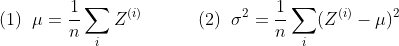

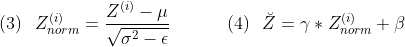


The batch normalization has 4 trainable parameters, the mean, variance, gamma (stdev influence), and beta (bias influence).

Having normalized outputs accounts for possible network instability tht could arise if a specific weight has a signficantly larger value than other weights in the layer, which would in turn influence the output of neurons downstream of this weighted connection. Increases computational speed of network.



## Calculating Paramaters


((shape of width of the filter * shape of height of the filter * number of filters in the previous layer+1)*number of filters)

last number of filters = biases

BATCH NORMLIZATION -> 4 parameters so calc will be 4*number of nodes in previous

https://medium.com/@iamvarman/how-to-calculate-the-number-of-parameters-in-the-cnn-5bd55364d7ca

https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d

https://deeplizard.com/learn/video/gmBfb6LNnZs